In [2]:
import scanpy as sc
import numpy as np
import pandas as pd


In [3]:
adata = sc.read_h5ad('droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 65662 × 26485
    obs: 'nGene', 'nUMI', 'orig.ident', 'channel', 'tissue', 'region', 'percent.ribo', 'free_annotation', 'patient', 'sample', 'location', 'magnetic.selection', 'preparation.site', 'compartment'
    obsm: 'X_Compartment_tSNE', 'X_tSNE'

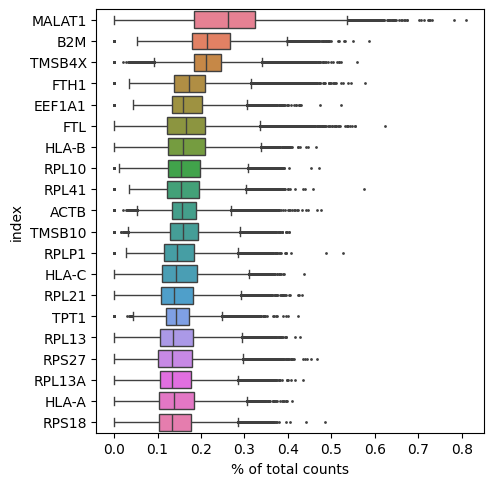

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

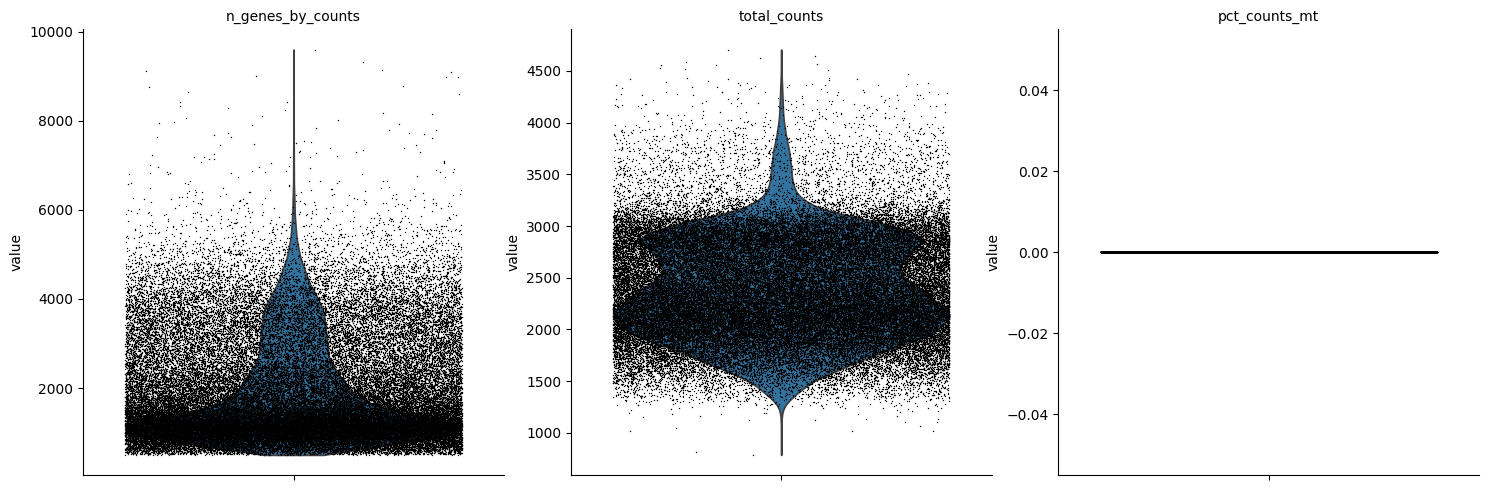

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

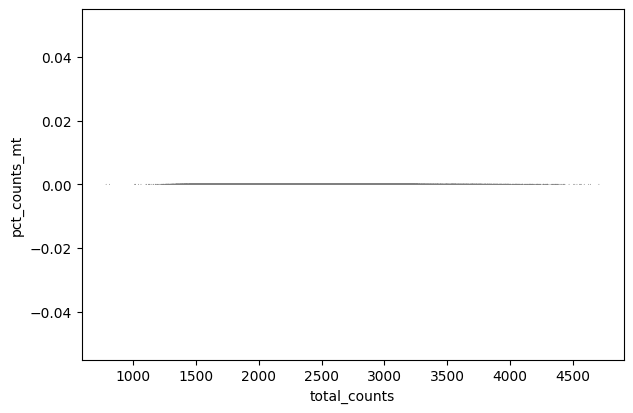

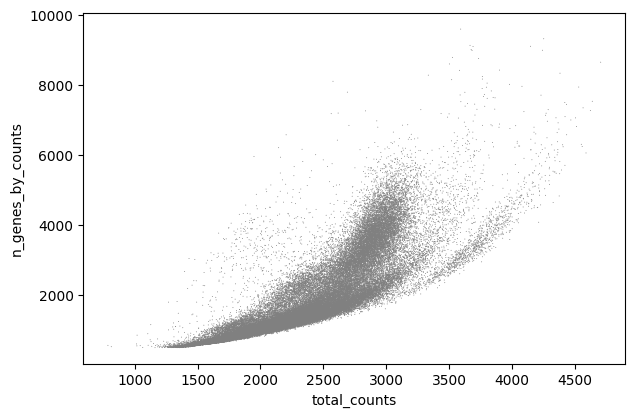

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [10]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
sc.pp.log1p(adata)

In [14]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

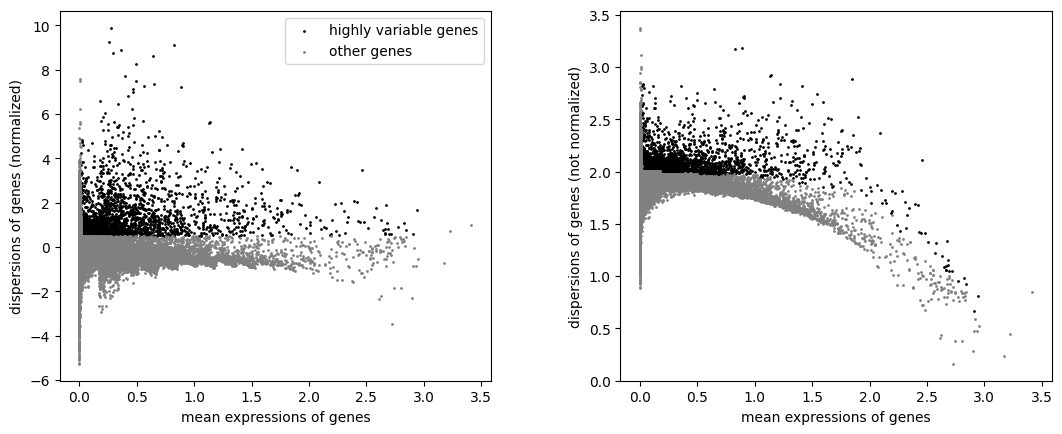

In [15]:
sc.pl.highly_variable_genes(adata)

In [16]:
adata.raw = adata

In [17]:
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'n_genes_by_counts'])


In [23]:
sc.pp.scale(adata, max_value=10)

In [24]:
sc.tl.pca(adata, svd_solver='arpack')


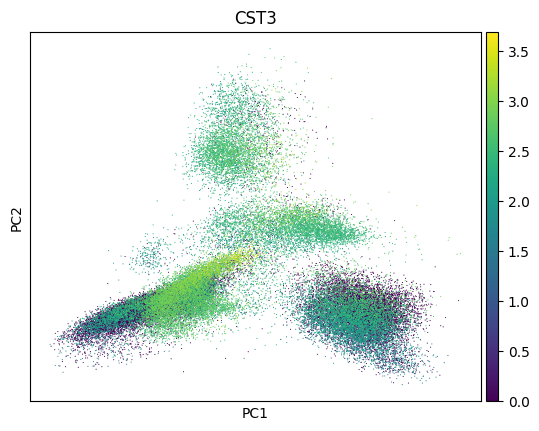

In [25]:
sc.pl.pca(adata, color='CST3')

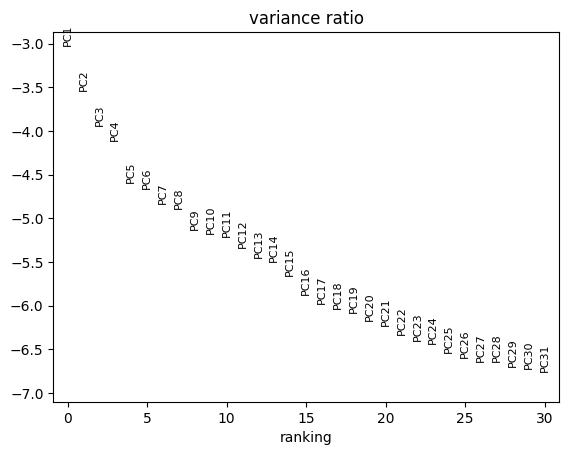

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

In [28]:
adata

AnnData object with n_obs × n_vars = 48368 × 2912
    obs: 'nGene', 'nUMI', 'orig.ident', 'channel', 'tissue', 'region', 'percent.ribo', 'free_annotation', 'patient', 'sample', 'location', 'magnetic.selection', 'preparation.site', 'compartment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_Compartment_tSNE', 'X_tSNE', 'X_pca'
    varm: 'PCs'

In [29]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [34]:
# sc.tl.paga(adata)
# sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

In [36]:
sc.pl.heatmap(adata, var_names='', groupby='tissue')

ValueError: groupby has to be a valid observation. Given bulk_labels, is not in observations: ['nGene', 'nUMI', 'orig.ident', 'channel', 'tissue', 'region', 'percent.ribo', 'free_annotation', 'patient', 'sample', 'location', 'magnetic.selection', 'preparation.site', 'compartment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'] or index name "index"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
